In [1]:
import pandas as pd
import numpy as np
import random as rnd
from termcolor import colored

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bold_start = '\033[1m'
underline_start = '\033[4m'
bu_end = '\033[0m'

Reading the data and understading the types

In [2]:
data = pd.read_csv('C:/Users/talro/OneDrive/Documents/death_prediction_synthetic.csv')
data.describe()

,age,sex,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,smoking,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,...,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.0,12438.000000,12438.000000,12438.000000,12438.000000
mean,43.501126,1.468805,1.677279,1.062631,89.837746,167.943906,31.871922,124.803988,77.315163,1.636678,...,0.127533,0.857694,0.006593,0.092057,0.318058,0.0,0.602669,0.702203,0.174867,0.015839
std,4.802035,0.499046,0.763641,0.242307,19.296247,10.068620,6.459714,13.615760,8.915362,0.871735,...,0.092716,0.349378,0.080931,0.289117,0.465741,0.0,0.489365,0.457308,0.379869,0.124856
min,30.000000,1.000000,1.000000,1.000000,41.000000,91.500000,15.790000,75.000000,40.000000,1.000000,...,0.007310,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,1.000000,76.000000,160.000000,27.400000,118.000000,70.000000,1.000000,...,0.061800,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,1.000000,1.000000,1.000000,88.000000,168.000000,31.050000,124.000000,79.000000,1.000000,...,0.102370,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
75%,48.000000,2.000000,2.000000,1.000000,100.000000,175.000000,35.350000,130.000000,80.000000,3.000000,...,0.163960,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000
max,49.000000,2.000000,3.000000,2.000000,203.000000,202.000000,95.550000,200.000000,135.000000,3.000000,...,0.802220,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [3]:
numberOfPeople = data.shape[0]
numberOfPeople

12438

Finding the cloumns with null values

In [4]:
nullContainCols = dict()
for colName in data.columns:
    data[data == "NA"] = np.nan
    data[data == "NaN"] = np.nan
    numOfNulls = data[colName].isna().sum()
    if numOfNulls > 0:
        nullContainCols[colName] = [numOfNulls, numOfNulls/numberOfPeople]
        print(underline_start + bold_start + colName + " have {} null values".format(numOfNulls) + bu_end)

albumin have 1463 null values
alb24h have 8918 null values
ACR have 1212 null values
gravity_u have 2530 null values
nitrites_u have 2520 null values
leuko_u have 2507 null values
proteinuria have 2506 null values


Total death rate

In [86]:
totalDeath = data["dead_5y"].sum()
print("The data death rate: "+ bold_start + str(round(totalDeath/numberOfPeople*100, 4))+"%" +bu_end)

The data death rate: 1.5839%


In [6]:
deathPercentage = data["dead_5y"].mean()
nonNullToDeathCorrelaition = dict()
print("The difference between the normal death percentage to the specified column correlation:")
for colName in nullContainCols.keys():
    nonNullValuesDeathes = data[~data[colName].isna()]['dead_5y'].sum()
    nonNullValues = numberOfPeople - nullContainCols[colName][0]
    nonNullCorrelationPercentage = nonNullValuesDeathes/nonNullValues
    percentageDeathDiff = np.abs(deathPercentage - nonNullCorrelationPercentage)
    print(underline_start + colName + bu_end, percentageDeathDiff)

The difference between the normal death percentage to the specified column correlation:
albumin 0.00019788721534895123
alb24h 0.001490986200646114
ACR 0.0005169843385243195
gravity_u 0.000699277865122595
nitrites_u 0.0007145423150003698
leuko_u 0.0007343401420274245
proteinuria 0.0007358609051276947


A quick search shows that above 30 ACR shows a some kind of a risk, when the ACR is over 300 it's a real issue.

([], 1494.57, 0.0)

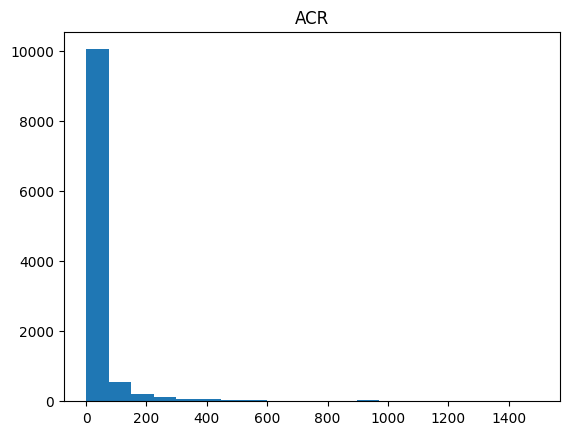

In [7]:
data.hist(column="ACR", bins=20, grid=False)
plt.plot(), max(data["ACR"]), min(data["ACR"])

I believe we may give up on columns with null values since they have a very small difference in death probability with other values, but we need to at least check the ACR and albumin values (not a lot of missing data) or alb24h (the maximum absolute error is 0.001490986200646114) to see if anything is correlated.

In [8]:
print(data['cancer'].sum())
# cancer columns doesn't have data so it can be dropped
data = data.drop(["cancer"], axis=1)
data.head()

0


,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,1,0.12908,1,0,0,1,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,...,1,0.08500,1,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,1,0.10715,1,0,0,1,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,1,0.10110,1,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,...,1,0.03950,1,0,0,0,0,1,0,0


# Hypotheses


1.  BMI is correct
2.  obesity correlates with death (BMI higher than 30)
3.  smoker/past smoker and death in 5 years have higher correlation




In [9]:
# First hypothesis 
countDiffBmi = 0
maxBmiDiff = 0
data["BMI local calculation"] = 0.0
for index, row in data.iterrows(): # BMI formula: kg/m^2
    bmi = round(np.abs(row['weigh']/((row['heigh']/100)**2)), 2)
    bmiDiff = np.abs(bmi - row['BMI'])
    if bmiDiff > 0.5: # BMI classified using integers range, I can take a mistake by up to 0.5 because it doesn't change the 
        countDiffBmi +=1
        data.at[index,"BMI local calculation"]= bmi
    else:
        data.at[index,"BMI local calculation"]= data.at[index,"BMI"]

    if bmiDiff > maxBmiDiff:
        maxBmiDiff = bmiDiff
        ind = index

print("The number of incorrect bmi according to weigh and heigh parameters:",countDiffBmi, "\nThe highest absolute error:",maxBmiDiff)
(data[data["BMI local calculation"] != 0]["dead_5y"].sum() / countDiffBmi)/ deathPercentage # check if the wrong bmi calculation affects the death ratio

The number of incorrect bmi according to weigh and heigh parameters: 1324 
The highest absolute error: 56.47


9.394259818731118

In the data, people with incorrect BMI tend to have more than twice the chance of dying in five years.

In [10]:
# Second hypothesis, according to google - bmi grater than 25-29.9.. is overweight and 30+ are degrees of obesity
data[data["BMI"] >= 25]["dead_5y"].sum() / data[data["BMI"] >= 25]["dead_5y"].count()

0.01458729727280964

In [11]:
data[data["BMI"] >= 25]["dead_5y"].sum() / totalDeath

0.817258883248731

Since many people suffer from being overweight, the death rate is lower than the normal population, **but** it can still contribute to us since 80+% of those who die in five years will suffer from obesity. The following part will analyze the effects of dividing BMI levels

In [12]:
# Over weight range 25-29.9
data[data["BMI"].between(25, 29.9)]["dead_5y"].sum() / data[data["BMI"].between(25, 29.9)]["dead_5y"].count()

0.012314007183170857

In [13]:
# Obesity 1 range 30-34.9
data[data["BMI"].between(30, 34.9)]["dead_5y"].sum() / data[data["BMI"].between(30, 34.9)]["dead_5y"].count()

0.012896292315959162

In [14]:
# Obesity 2 range 35-39.9
data[data["BMI"].between(35, 39.9)]["dead_5y"].sum() / data[data["BMI"].between(35, 39.9)]["dead_5y"].count()

0.014035087719298246

In [15]:
# Extreme Obesity range 40+
data[data["BMI"] > 39.9 ]["dead_5y"].sum() / data[data["BMI"] > 39.9]["dead_5y"].count()

0.026415094339622643

In 5 years, extreme obesity has a greater chance of dying

In [16]:
# Thired hypothesis
data[data["smoking"] > 1]['dead_5y'].sum() / data[data["smoking"] > 1]['dead_5y'].count()

0.02072538860103627

In [17]:
data[data["smoking"] == 2]['dead_5y'].sum() / data[data["smoking"] == 2]['dead_5y'].count() # Past smoker

0.013382899628252789

In [18]:
data[data["smoking"] == 3]['dead_5y'].sum() / data[data["smoking"] == 3]['dead_5y'].count() # Smoker

0.02372984484332218

In the beginning, we can see that grouping together past smokers and smokers contributes us a higher death rate than the normal death rate distribution. The previous steps showed that past smokers didn't contribute to the death rate so we'll drop the past smokers from the hypothesis

We'll check the relevant columns (the data should be countable and not names for example) and make a list out of them in order to find the variance and plot the histogram and its function approximation.

In [19]:
relevantColumns = []
for col in data.columns:
  if data[col].dtype in [ 'float64', 'int64']:
    relevantColumns.append(col)
    variance = data[col].var()
    print("{:<22} - Variance: {:<15}".format(col, variance))


age                    - Variance: 23.059538814974633
sex                    - Variance: 0.24904691214714286
ses                    - Variance: 0.5831469913719706
residence_cd           - Variance: 0.05871277037846564
weigh                  - Variance: 372.34516185030276
heigh                  - Variance: 101.37710324495983
BMI                    - Variance: 41.727910643677255
bp_sys                 - Variance: 185.38892998360876
bp_dias                - Variance: 79.48368257768631
smoking                - Variance: 0.7599218084552156
HbA1c                  - Variance: 3.4866225330491436
glucose                - Variance: 4189.297436400571
creatinin              - Variance: 0.1839334913201319
albumin                - Variance: 0.10843471372034155
alb24h                 - Variance: 16682108.327194246
ACR                    - Variance: 13915.05287796538
cholesterol_total      - Variance: 1648.9334193344907
LDL                    - Variance: 1102.6758788667778
HDL                    - Var

When using histograms, it is easier to see the effect of smoking on death, for example

Text(0.5, 1.0, 'Dead in 5y')

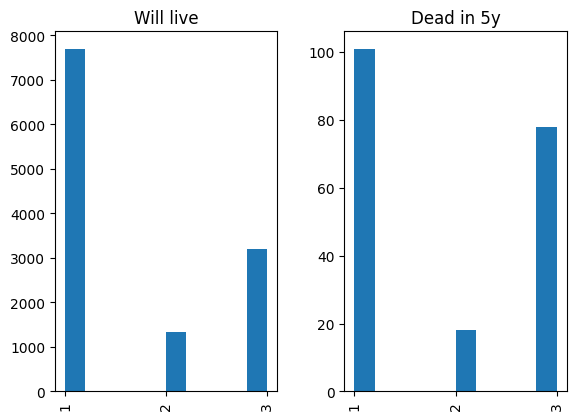

In [20]:
ax = data.hist(column='smoking', by='dead_5y')
ax[0].set_xticks(range(1,4))
ax[0].set_title("Will live")
ax[1].set_xticks(range(1,4))
ax[1].set_title("Dead in 5y")

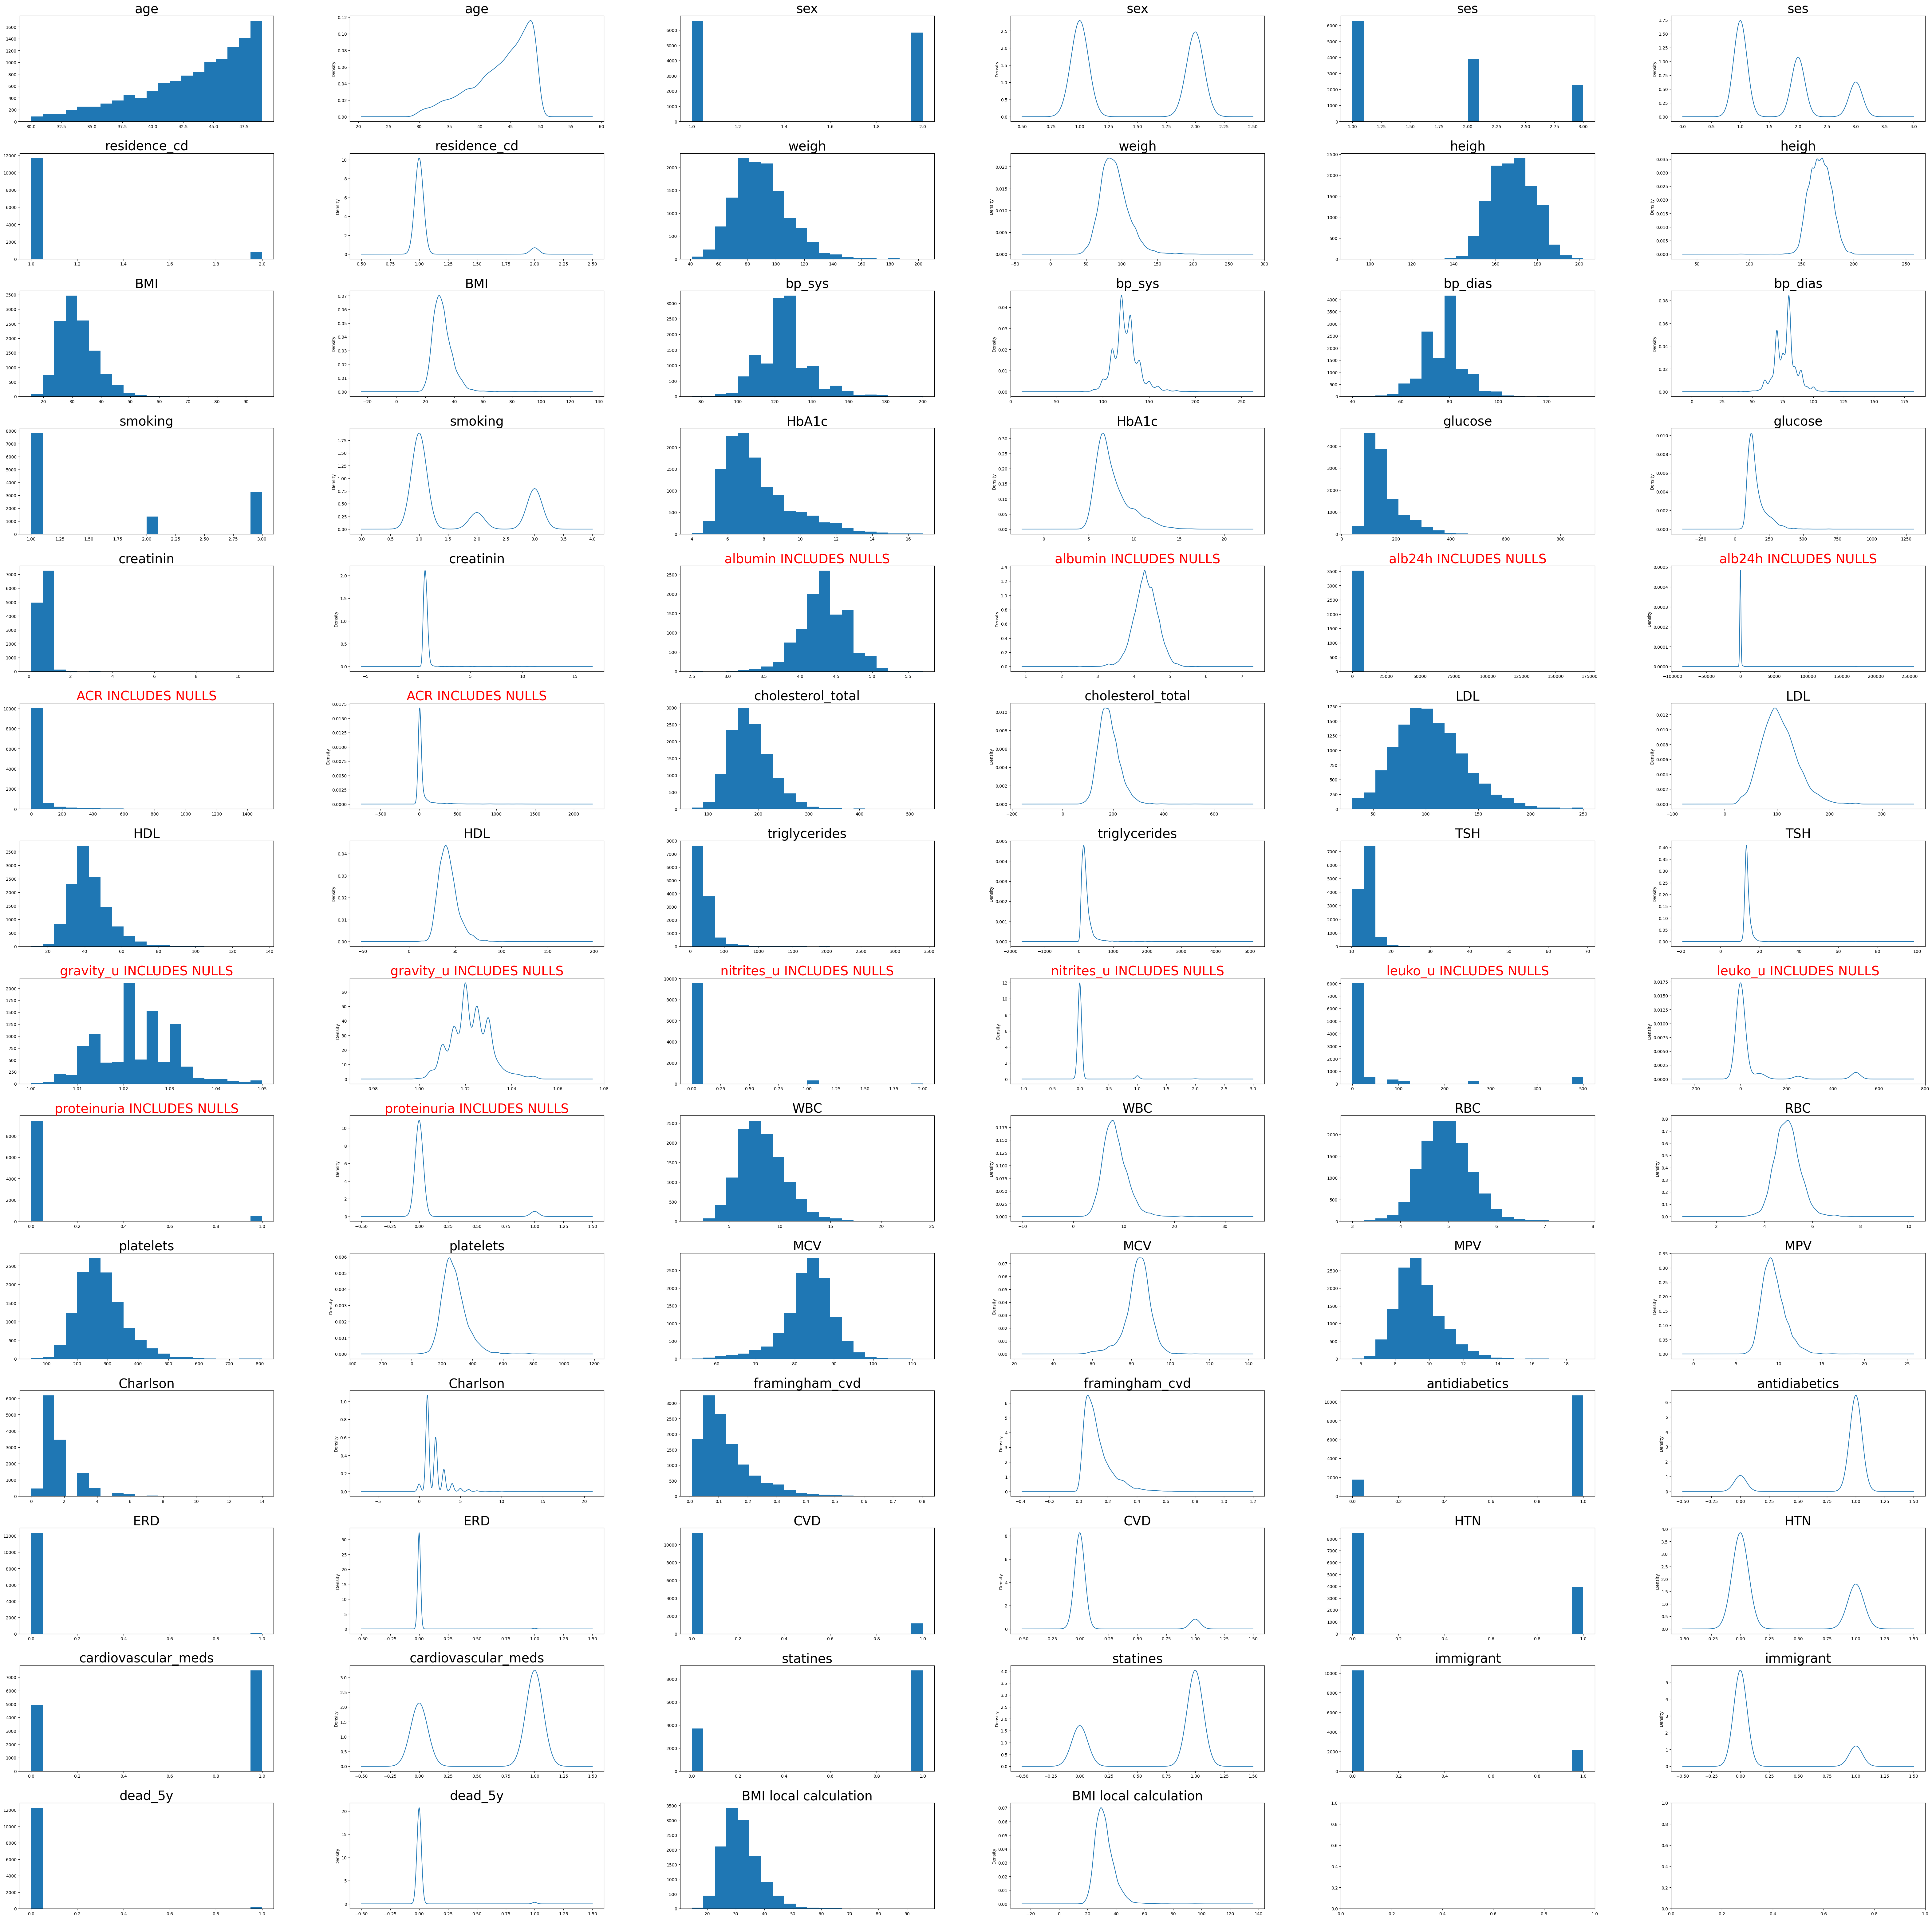

In [21]:
fig, axes = plt.subplots(nrows=14, ncols=6) 
fig.set_figheight(80)
fig.set_figwidth(80)
i = 0
j = 0
for col in relevantColumns:
  data.hist(column=col, bins=20, grid=False, ax=axes[i, j%3*2])
  data[col].plot.kde(ax=axes[i, j%3*2+1])
  title = col
  fontSize = 30
  colour = 'black'
  if col in nullContainCols:
    title += " INCLUDES NULLS"
    colour = 'red'
  axes[i, j%3*2].set_title(title, fontsize=fontSize, color=colour)
  axes[i, j%3*2+1].set_title(title, fontsize=fontSize, color=colour)
  j += 1 
  if j % 3 == 0:
     i += 1

In [22]:
# It's seems like we can use linear expansion for the following columns, the data seems too crowded 
data["creatinin"].describe(), data["framingham_cvd"].describe()

(count    12438.000000
 mean         0.751235
 std          0.428875
 min          0.110000
 25%          0.600000
 50%          0.710000
 75%          0.840000
 max         11.150000
 Name: creatinin, dtype: float64,
 count    12438.000000
 mean         0.127533
 std          0.092716
 min          0.007310
 25%          0.061800
 50%          0.102370
 75%          0.163960
 max          0.802220
 Name: framingham_cvd, dtype: float64)

C:\Users\talro\AppData\Local\Temp\ipykernel_27496\8906320.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels)
C:\Users\talro\AppData\Local\Temp\ipykernel_27496\8906320.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels)


Text(0.5, 1.0, 'Dead in 5y')

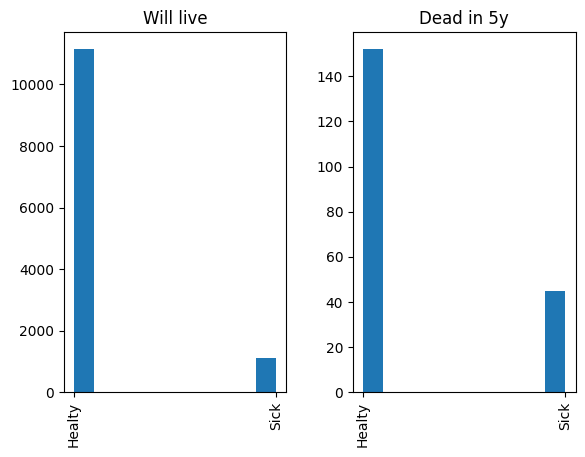

In [23]:
ax = data.hist(column='CVD', by='dead_5y')
labels = ["Healty", "Sick"]
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)
ax[0].set_xticks(range(2))
ax[0].set_title("Will live")
ax[1].set_xticks(range(2))
ax[1].set_title("Dead in 5y")

Because we can see an obvious effect of the parameters on the death rate, I believe it is a good starting point. As for the previous questions, I think it's possible to drop the columns that have many null values because they don't contribute much.



In [24]:
data.select_dtypes(exclude=['int64', 'float64'])

,marital_status,residence,bp_cat,smoking_status
0,U,urban,Normal,non_smoker
1,M,urban,Normal,non_smoker
2,U,urban,Pre-HTN,non_smoker
3,U,urban,Normal,current_smoker
4,U,urban,Normal,non_smoker
...,...,...,...,...
12433,U,urban,Pre-HTN,non_smoker
12434,M,urban,Normal,non_smoker
12435,U,urban,Normal,current_smoker
12436,M,urban,Normal,non_smoker


It is now possible to map the marital status to numbers in order to use models in the future

In [25]:
data['marital_status'] = data['marital_status'].map({"M": 1, "U": 0}).astype(int)

We can drop the string residence column since the residence and residence_cd columns both contain the same value.

In [26]:
data = data.drop(["residence"], axis=1)

This will transform a string-based column into a numbers-based column, as we did already

In [27]:
data['bp_cat'].value_counts()

Normal     7496
Pre-HTN    2809
HTN-G1     1691
HTN-G2      367
HTN-G3       75
Name: bp_cat, dtype: int64

In terms of the bp_cat feature, it is easier to give the normal value of zero if the column will later be summed or multiplied.

In [28]:
data['bp_cat'] = data['bp_cat'].map({"Normal": 0, "Pre-HTN": 1, "HTN-G1": 2, "HTN-G2": 3, "HTN-G3": 4}).astype(int)

The bp_dias and bp_sys have a significant effect on bp_cat, so we'll divide it into five groups as the bp_cat and search for correlations between the death rates.

In [29]:
data["bp_sys"] = pd.qcut(data['bp_sys'], 5, labels=range(5))
data[['bp_sys', 'dead_5y']].groupby(['bp_sys'], as_index = False).mean().sort_values(by = 'bp_sys', ascending = False), data['bp_sys'].value_counts()

(  bp_sys   dead_5y
 4      4  0.027205
 3      3  0.012248
 2      2  0.017427
 1      1  0.009019
 0      0  0.014866,
 1    2772
 0    2758
 3    2531
 4    2426
 2    1951
 Name: bp_sys, dtype: int64)

In [30]:
data["bp_dias"] = pd.qcut(data['bp_dias'], 5, labels=range(5))
data[['bp_dias', 'dead_5y']].groupby(['bp_dias'], as_index = False).mean().sort_values(by = 'bp_dias', ascending = False), data['bp_dias'].value_counts()

(  bp_dias   dead_5y
 4       4  0.021553
 3       3  0.017134
 2       2  0.012455
 1       1  0.013068
 0       0  0.017049,
 2    4175
 0    3402
 4    2459
 1    1760
 3     642
 Name: bp_dias, dtype: int64)

In [31]:
data['smoking_status'].value_counts(), data['smoking'].value_counts()

(non_smoker        7806
 current_smoker    3287
 past_smoker       1345
 Name: smoking_status, dtype: int64,
 1    7806
 3    3287
 2    1345
 Name: smoking, dtype: int64)

Smoking status is the same as smoking data, so we can remove that column

In [32]:
data = data.drop(["smoking_status"], axis=1)
data.head()

,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y,BMI local calculation
0,49,2,0,1,1,84.0,160.0,32.79,1,0,...,0.12908,1,0,0,1,1,1,0,0,32.79
1,46,2,1,1,1,67.0,152.0,29.38,0,1,...,0.08500,1,0,0,0,1,1,0,0,29.38
2,46,2,0,1,1,62.4,148.0,28.31,3,4,...,0.10715,1,0,0,1,1,1,0,0,28.31
3,45,1,0,2,1,73.9,166.0,26.85,0,0,...,0.10110,1,0,0,0,0,1,0,0,26.85
4,49,2,0,1,1,53.0,161.0,20.45,0,0,...,0.03950,1,0,0,0,0,1,0,0,20.45


Alb24h has a large number of null values, so I am dropping it, along with nitrites_u and leuko_u, which aid in determining urinary tract infections.

The ACR contains a small number of nulls, which can be fixed with zeros or small numbers close to them.

Histograms can be used to fix gravity_u columns using a normal distribution

The albumin distribution is fairly normal and there are only a few nulls, so I will fix it

It is stated on the Cleveland Clinic website that the following people have a high risk of proteinuria, but it is manageable, so we can drop it as well.

1. Are 65 years old or older.
2. Have a family member who has or had kidney disease.
3. Have diabetes or another condition that affects your kidneys.
4. Are Black, Hispanic, Native American or Pacific Islander.


In [33]:
data = data.drop(['alb24h', 'nitrites_u',  'leuko_u', 'proteinuria'], axis=1)

By filling in the missing data on gravity_u using fillna's default methods, it appears that the ratio will remain the same

In [34]:
data["ACR"].fillna(0)
temp = data.copy()
temp.gravity_u = temp['gravity_u'].fillna(method='ffill')

array([[<AxesSubplot: title={'center': 'gravity_u'}>]], dtype=object)

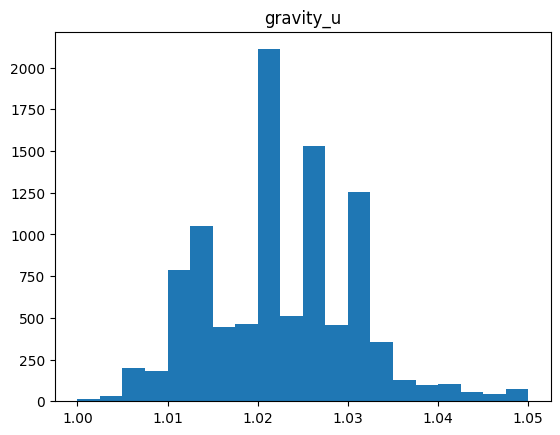

In [35]:
# Compering the data before and after the nulls filled
data.hist(column="gravity_u", bins=20, grid=False)

array([[<AxesSubplot: title={'center': 'gravity_u'}>]], dtype=object)

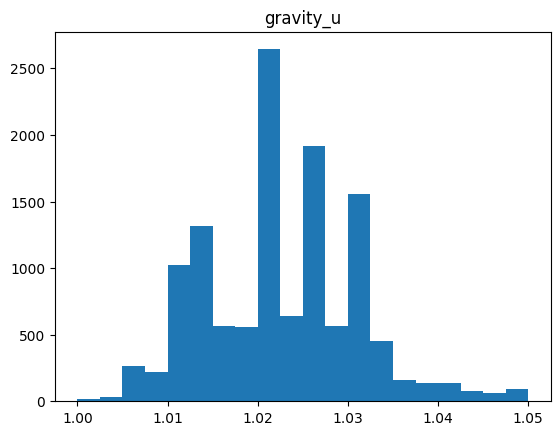

In [36]:
temp.hist(column="gravity_u", bins=20, grid=False)

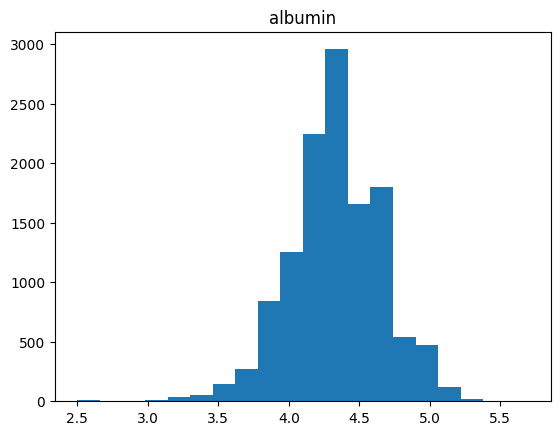

In [37]:
data.gravity_u = data['gravity_u'].fillna(method='ffill')
data.albumin = data['albumin'].fillna(method='ffill')
data.hist(column="albumin", bins=20, grid=False)
data["albumin"] = pd.qcut(data['albumin'], 4, labels=range(4))

The next step is to look for features that cross-correlate.

C:\Users\talro\AppData\Local\Temp\ipykernel_27496\4237766895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), cmap='Greys')


<AxesSubplot: >

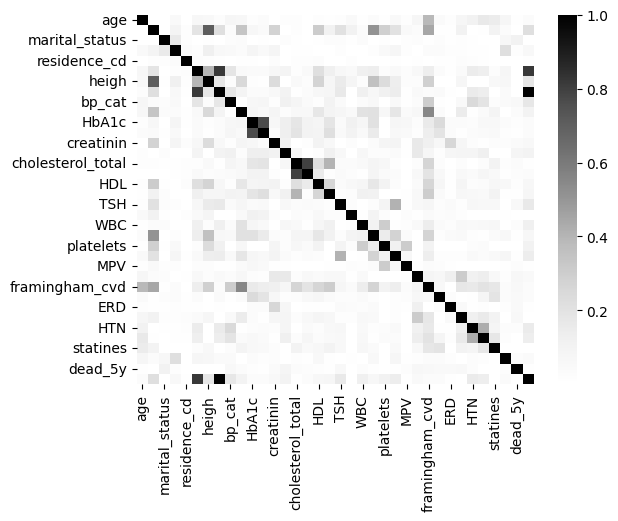

In [38]:
sns.heatmap(data.corr().abs(), cmap='Greys')

We can divide weight and height into 6 groups, three for each sex, since they are distributed fairly normally

In [39]:
data.loc[(data['weigh'] <= 65) & (data['sex'] == 1), 'weigh'] = 1
data.loc[(data['weigh'] < 100) & (data['weigh'] > 65) & (data['sex'] == 1), 'weigh'] = 2
data.loc[(data['weigh'] >= 100) & (data['sex'] == 1), 'weigh'] = 3

data.loc[(data['weigh'] <= 50) & (data['sex'] == 2), 'weigh'] = 4
data.loc[(data['weigh'] < 90) & (data['weigh'] > 50) & (data['sex'] == 2), 'weigh'] = 5
data.loc[(data['weigh'] >= 90) & (data['sex'] == 2), 'weigh'] = 6
data['weigh'].value_counts()


2.0    4154
5.0    3551
6.0    2222
3.0    2168
1.0     285
4.0      58
Name: weigh, dtype: int64

In [40]:
data.loc[(data['heigh'] < 160) & (data['sex'] == 1), 'heigh'] = 1
data.loc[(data['heigh'] <= 190) & (data['heigh'] >= 160) & (data['sex'] == 1), 'heigh'] = 2
data.loc[(data['heigh'] > 190) & (data['sex'] == 1), 'heigh'] = 3

data.loc[(data['heigh'] < 150) & (data['sex'] == 2), 'heigh'] = 4
data.loc[(data['heigh'] <= 178) & (data['heigh'] >= 150) & (data['sex'] == 2), 'heigh'] = 5
data.loc[(data['heigh'] > 178) & (data['sex'] == 2), 'heigh'] = 6
data['heigh'].value_counts()


2.0    6395
5.0    5564
4.0     239
3.0     110
1.0     102
6.0      28
Name: heigh, dtype: int64

In [41]:
def death_ratio_print_chagne(num_lst, col_name, change=False):
    i=0
    for num in num_lst:
        death_percentage = ((data.loc[(data[col_name] >= num[0]) & (data[col_name] < num[1]) & (data['dead_5y'] == 1)].count()[col_name])/(data.loc[(data[col_name] >= num[0]) & (data[col_name] < num[1])].count()[col_name]))
        print(f"Range: {num} -" + " Death percentage: %.4f" % death_percentage)
        print(f"Number of people in range: {num} -",data.loc[(data[col_name] >= num[0]) & (data[col_name] < num[1])].count()[col_name])
        if change:
            data.loc[(data[col_name] >= num[0]) & (data[col_name] < num[1]), col_name] = i 
            i+=1

We will divide the population into groups according to the death ratio of 0.015839, which can help us determine the death percentage 

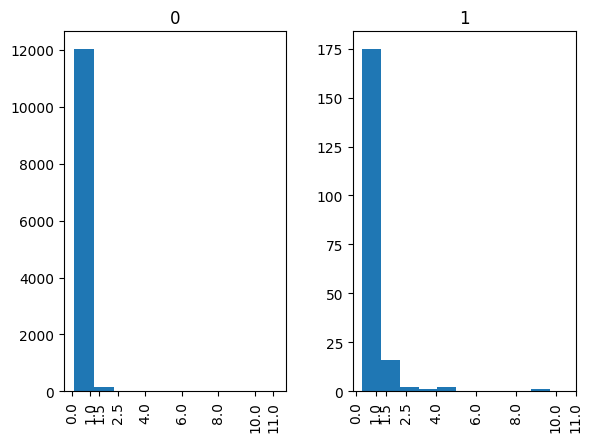

In [42]:
ax = data.hist(column='creatinin', by='dead_5y')
ticks = [0, 1, 1.5, 2.5, 4, 6, 8, 10, 11]
ax[0].set_xticks(ticks)
ax[1].set_xticks(ticks)

In [43]:
num_lst = [(0, 2), (2, 5), (5, max(data['creatinin']+0.01))]
death_ratio_print_chagne(num_lst, 'creatinin', change=True)

Range: (0, 2) - Death percentage: 0.0154
Number of people in range: (0, 2) - 12374
Range: (2, 5) - Death percentage: 0.1765
Number of people in range: (2, 5) - 34
Range: (5, 11.16) - Death percentage: 0.0333
Number of people in range: (5, 11.16) - 30


The groups:
- 0-2 have 0.0154, almost the same distribution as all the data.
- 2-5 can also contribute because of the high percentage of death ratio
- 5-max is because of the small number of people left.

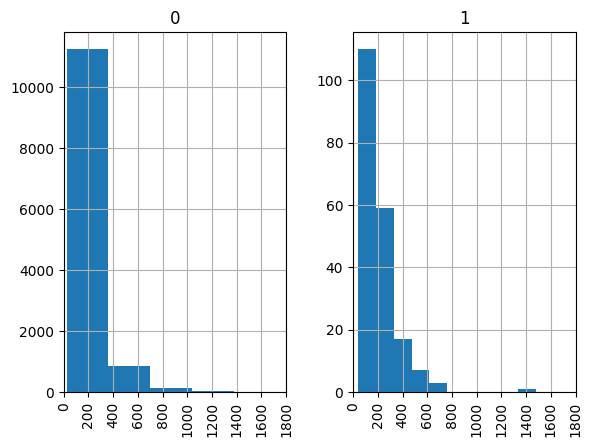

In [44]:
ax1 = data.hist(column='triglycerides', by='dead_5y')
ax1[0].set_xlim(-0.5,1500)
ax1[1].set_xlim(-0.5,1500)
ticks = range(0,2000,200)
ax1[0].set_xticks(ticks[:10])
ax1[1].set_xticks(ticks)
ax1[0].grid()
ax1[1].grid()

In [45]:
num_lst = [(0, 400), (400, max(data['triglycerides']+0.01))]
death_ratio_print_chagne(num_lst, 'triglycerides', change=True)

Range: (0, 400) - Death percentage: 0.0154
Number of people in range: (0, 400) - 11688
Range: (400, 3404.01) - Death percentage: 0.0227
Number of people in range: (400, 3404.01) - 750


The data shows that individuals with triglyceride levels of 400 or less have a similar death rate, while those with levels above 400 have a higher death rate.

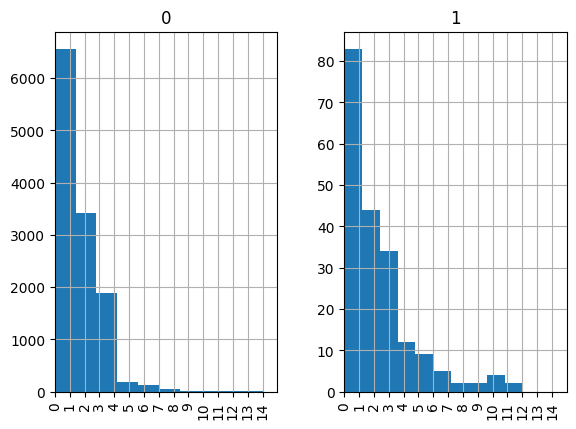

In [46]:
ax2= data.hist(column='Charlson', by='dead_5y')
ax2[0].set_xlim(0,15)
ax2[1].set_xlim(0,15)
ticks = range(0,15,1)
ax2[0].set_xticks(ticks)
ax2[1].set_xticks(ticks)
ax2[0].grid()
ax2[1].grid()

In [47]:
num_lst = [(0, 5), (5, max(data['Charlson'])+0.01)]
death_ratio_print_chagne(num_lst, 'Charlson', change=True)


Range: (0, 5) - Death percentage: 0.0144
Number of people in range: (0, 5) - 12032
Range: (5, 14.01) - Death percentage: 0.0591
Number of people in range: (5, 14.01) - 406


Charlston online definition: 0-2 mild, 3-4 moderate and >=5 severe
We defitently see that score >=5 reflects in the death ratio.

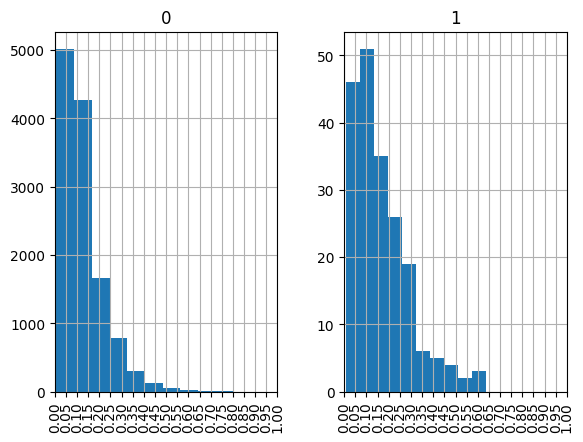

In [48]:
ax2= data.hist(column='framingham_cvd', by='dead_5y')
ax2[0].set_xlim(0,1)
ax2[1].set_xlim(0,1)
ticks = np.linspace(0,1,21)
ax2[0].set_xticks(ticks)
ax2[1].set_xticks(ticks)
ax2[0].grid()
ax2[1].grid()

In [49]:
num_lst = [(0, 0.2), (0.2, 0.4), (0.4 ,max(data['framingham_cvd'])+0.01)]
death_ratio_print_chagne(num_lst, 'framingham_cvd', change=True)

Range: (0, 0.2) - Death percentage: 0.0129
Number of people in range: (0, 0.2) - 10298
Range: (0.2, 0.4) - Death percentage: 0.0268
Number of people in range: (0.2, 0.4) - 1901
Range: (0.4, 0.81222) - Death percentage: 0.0544
Number of people in range: (0.4, 0.81222) - 239


In line with previous columns, we use higher values to represent a higher likelihood of death within five years.

Range: [-0.5, 0.5] - Death percentage: 0.0118
Number of people in range: [-0.5, 0.5] - 9997
Range: [0.5, 1.5] - Death percentage: 0.0283
Number of people in range: [0.5, 1.5] - 2120
Range: [1.5, 2.5] - Death percentage: 0.0537
Number of people in range: [1.5, 2.5] - 298
Range: [2.5, 3.5] - Death percentage: 0.1304
Number of people in range: [2.5, 3.5] - 23


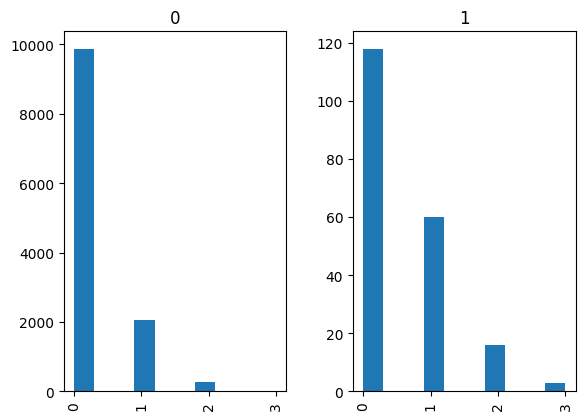

In [50]:
data["CharlsAndCvd"] = data['Charlson'] + data['framingham_cvd']
data.hist(column='CharlsAndCvd', by='dead_5y')
num_lst = [[-0.5+i,0.5+i] for i in range(4)]
death_ratio_print_chagne(num_lst,'CharlsAndCvd')

The use of two risk rates creates a more accurate risk rate.

Range: [-0.5, 0.5] - Death percentage: 0.0135
Number of people in range: [-0.5, 0.5] - 4441
Range: [0.5, 1.5] - Death percentage: 0.0106
Number of people in range: [0.5, 1.5] - 3884
Range: [1.5, 2.5] - Death percentage: 0.0206
Number of people in range: [1.5, 2.5] - 3552
Range: [2.5, 3.5] - Death percentage: 0.0398
Number of people in range: [2.5, 3.5] - 553
Range: [3.5, 4.5] - Death percentage: 0.1250
Number of people in range: [3.5, 4.5] - 8


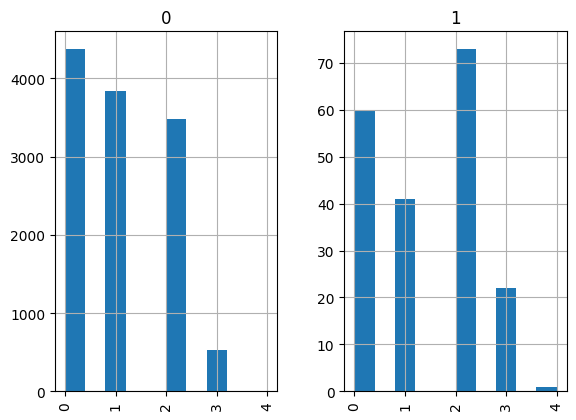

In [51]:
data["sicks"] = data['ERD']+ data['CVD'] + data['HTN'] + data['cardiovascular_meds']
ax3 = data.hist(column='sicks', by='dead_5y')
ticks = np.linspace(0, 4, 5)
ax3[0].set_xticks(ticks)
ax3[1].set_xticks(ticks)
ax3[0].grid()
ax3[1].grid()
num_lst = [[-0.5+i,0.5+i] for i in range(5)]
death_ratio_print_chagne(num_lst,'sicks')

Previously, we observed that combining the columns for different medications can indicate a strong correlation with mortality. I did not include the column for antidiabetic medications in this analysis because it is commonly found in our database and does not provide unique information about the specific features im looking.

**Summery:**
Currently, all features have numeric values and crowded features have been transformed into groups of integers. In the future, I will transform additional features into integers and address the BMI-weight-height and bp_... features.

In [52]:
pd.options.display.max_columns = None
data

,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant,dead_5y,BMI local calculation,CharlsAndCvd,sicks
0,49,2,0,1,1,5.0,5.0,32.79,1,0,0,1,11.0,238,0.0,0,6.00,211.6,114.0,39.0,0,12.5,1.025,10.6,5.11,295,87.9,7.7,0,0.0,1,0,0,1,1,1,0,0,32.79,0.0,2
1,46,2,1,1,1,5.0,5.0,29.38,0,1,0,1,7.0,119,0.0,2,3.87,154.0,79.0,41.0,0,13.5,1.021,8.7,4.45,204,78.1,8.2,0,0.0,1,0,0,0,1,1,0,0,29.38,0.0,1
2,46,2,0,1,1,5.0,4.0,28.31,3,4,1,1,11.8,202,0.0,2,6.35,252.0,65.0,57.0,0,13.8,1.030,11.5,5.73,772,85.1,10.2,0,0.0,1,0,0,1,1,1,0,0,28.31,0.0,2
3,45,1,0,2,1,2.0,2.0,26.85,0,0,0,3,6.9,203,0.0,3,5.00,149.0,92.0,37.0,0,12.6,1.017,9.1,5.06,299,84.6,9.1,0,0.0,1,0,0,0,0,1,0,0,26.85,0.0,0
4,49,2,0,1,1,5.0,5.0,20.45,0,0,0,1,8.7,152,0.0,2,0.48,178.0,94.8,57.0,0,11.9,1.028,6.1,4.64,181,89.8,8.9,0,0.0,1,0,0,0,0,1,0,0,20.45,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,46,1,0,2,1,1.0,2.0,18.78,3,2,1,1,7.3,132,0.0,2,5.00,152.0,82.2,48.0,0,16.8,1.025,10.9,4.81,483,63.4,8.8,0,0.0,1,0,0,0,1,0,0,0,18.78,0.0,1
12434,45,2,1,1,1,5.0,5.0,38.16,0,0,0,1,6.8,101,0.0,2,2.31,167.2,33.7,44.0,0,13.8,1.025,10.9,4.44,249,91.2,11.0,0,0.0,1,0,0,0,0,1,0,0,38.16,0.0,0
12435,49,1,0,1,1,1.0,2.0,21.77,0,0,0,3,7.7,90,0.0,0,NaN,161.7,95.7,36.0,0,14.7,1.020,7.4,4.77,308,82.4,9.6,0,2.0,0,0,1,1,1,1,0,0,21.77,2.0,3
12436,47,2,1,1,1,6.0,5.0,35.60,0,0,0,1,6.2,115,0.0,1,5.00,167.0,33.7,33.0,0,12.5,1.014,6.3,4.59,265,86.5,8.0,0,0.0,1,0,0,0,0,1,0,0,35.60,0.0,0


Israel death and 30-50 years old total population:
Year    |   Death   |  Population | Death Rate
2018        1770       2,229,702    0.08%
2017        1780       2,191,646    0.081%
2016        1798       2,150,096    0.091%
2015        1697       2,110,721    0.08%
2014        1733       2,070,562    0.084% (צוק איתן)
2013        1694       2,030,785    0.083%



In [79]:
old_death_population = {
    2018: (1770, 2229702),
    2017: (1780, 2191646),
    2016: (1798, 2150096),
    2015: (1697, 2110721),
    2014: (1733, 2070562),
    2013: (1694, 2030785),
    2012: (1699, 1990188),
    2011: (1704, 1952624),
    }
print(f'{"Year":<8s} | {"Death":<10s} | {"Population":<10s} | {"DeathRate":<10s}')
for year in old_death_population.keys():
    death_rate_s = round((old_death_population[year][0]/old_death_population[year][1])*100, 4)
    print(f'{year:<8} | {old_death_population[year][0]:<10} | {old_death_population[year][1]:<10} | {death_rate_s:<10}%')

Year     | Death      | Population | DeathRate 
2018     | 1770       | 2229702    | 0.0794    %
2017     | 1780       | 2191646    | 0.0812    %
2016     | 1798       | 2150096    | 0.0836    %
2015     | 1697       | 2110721    | 0.0804    %
2014     | 1733       | 2070562    | 0.0837    %
2013     | 1694       | 2030785    | 0.0834    %
2012     | 1699       | 1990188    | 0.0854    %
2011     | 1704       | 1952624    | 0.0873    %
